In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve 
import joblib

In [30]:
#Loading the dataset aand checking the structure
df = pd.read_csv("Phishing_Email.csv")
df = df[['Email Text', 'Email Type']]
df.columns = ['text', 'label']  # Renamed for simplicity

In [31]:
df.head()

,text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [32]:
print("\n GOAL: Predict whether an email is PHISHING or SAFE")
print("Target variable (label):", df['label'].unique())
print("Total samples:", len(df))


 GOAL: Predict whether an email is PHISHING or SAFE
Target variable (label): ['Safe Email' 'Phishing Email']
Total samples: 18650


In [33]:
#Data Preparation
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
#Selecting the features
df['text_length'] = df['text'].astype(str).apply(len)

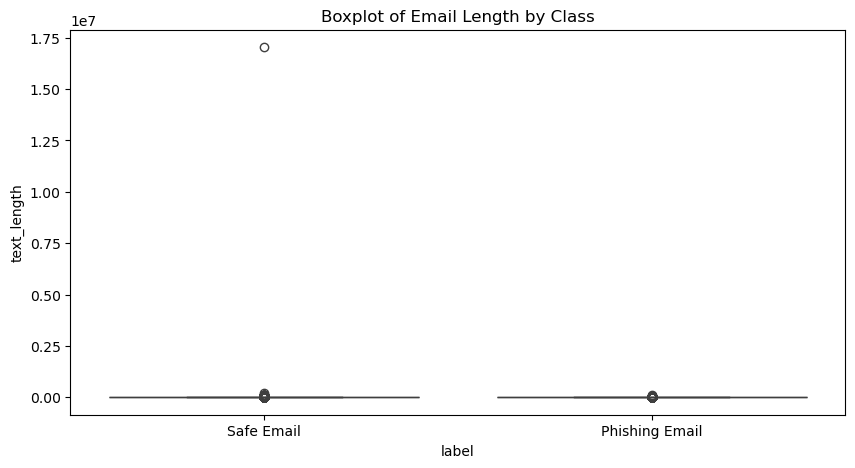

In [12]:
#Visualizing outliers with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='label', y='text_length')
plt.title("Boxplot of Email Length by Class")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_length', hue='label', kde=True) 
plt.title("Distribution of Text Length")
plt.show()

In [ ]:
#Text cleaning using fallback method

stop_words = set(['a','an','the','and','or','if','in','of','to','on','is','are','this','that','for','it','with','as','was','but','be','by','at'])

def clean_text(text): 
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text) 
    tokens = text.split() 
    tokens = [word for word in tokens if word not in stop_words] 
    return ' '.join(tokens)

df['clean_text'] = df['text'].astype(str).apply(clean_text)

In [ ]:
 #Encode labels

df = df[df['label'].isin(['Safe Email', 'Phishing Email'])]
df['label'] = df['label'].map({'Safe Email': 0, 'Phishing Email': 1})


In [ ]:
#Step 2.6: Split data

X = df['clean_text']
y = df['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 2.7: Vectorize text

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
#Step 3.1: Train model

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

#Step 3.2: Predict

y_pred = model.predict(X_test_tfidf)


 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2213
           1       0.98      0.95      0.96      1295

    accuracy                           0.97      3508
   macro avg       0.98      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508


 Confusion Matrix:


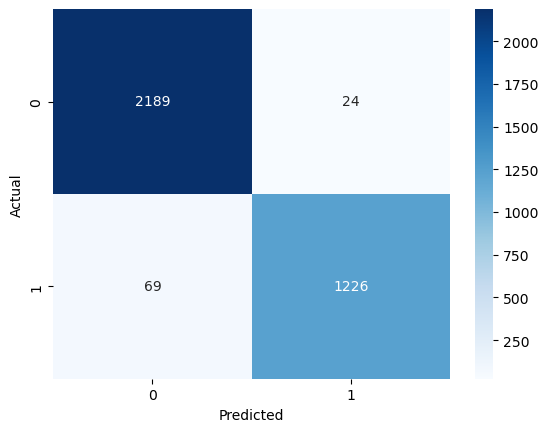

In [27]:
#Evaluate using confusion Matrix

print("\n Classification Report:") 
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:") 
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

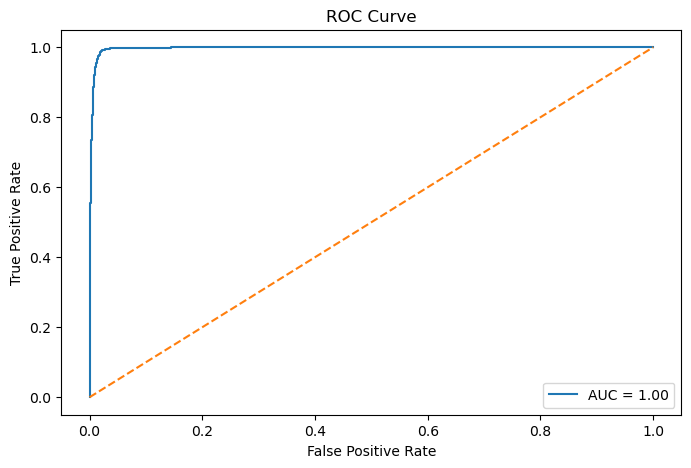

In [23]:
#Plotted the ROC-AUC Curve for better assurance

probs = model.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs) 
roc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(8,5)) 
plt.plot(fpr, tpr, label=f'AUC = {roc_score:.2f}') 
plt.plot([0,1], [0,1], linestyle='--') 
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate") 
plt.title("ROC Curve") 
plt.legend() 
plt.show()

In [26]:
#Saved the model & vectorizer

joblib.dump(model, 'phishing_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("\n Model and vectorizer saved!")



 Model and vectorizer saved!
